# Notebook to find the quality of mapping done by STAR Solo for samples from SRA Project - PRJEB39602 - D3

- **Developed by**: Srivalli Kolla

- **Created date** : 29 October, 2024

- **Modification date** : 05 November, 2024

- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

Env : Scanpy(Python 3.12.4)

# Import Packages

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
pkg_res

# Import data

In [3]:
parent_folder = '/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files'
folders = ['ERR6449986',
'ERR7423245',
'ERR7423246',
'ERR7423472',
'ERR6449756',
'ERR6449758',
'ERR6449761',
'ERR6449775',
'ERR6449954',
'ERR6449985',
'ERR7423243',
'ERR7423262',
'ERR7423473',
'ERR6449755',
'ERR6449757',
'ERR6449759',
'ERR6449760',
'ERR6449762',
'ERR6449764',
'ERR6449770',
'ERR6449984',
'ERR6450000',
'ERR7423251',
'ERR7423441',
'ERR7423471',
'ERR7423487',
'ERR7423242',
'ERR7423244',
'ERR7423247',
'ERR7423248',
'ERR7423249',
'ERR7423257',]

# Define 'Uniquely mapped reads %' extraction from file

1. Define the folder and file structure to access correct file
2. Extract percentage
3. Make a dataframe with folder name and plot

In [4]:
def extract_uniquely_mapped_reads_percentage(file_path):
    """Extracts uniquely mapped reads percentage from a specified Log.final.out file."""
    with open(file_path, 'r') as f:
        for line in f:
            if 'Uniquely mapped reads %' in line:
                # Extract the percentage value
                percentage = float(line.split('|')[-1].strip().replace('%', ''))
                return percentage
    return None 

# Plotting

In [5]:
def extract_uniquely_mapped_reads_percentage(log_file_path):
    """Extract the uniquely mapped reads percentage from a given log file."""
    percentage = None
    with open(log_file_path, 'r') as file:
        for line in file:
            if 'Uniquely mapped reads %' in line:
                parts = line.split()
                percentage_str = parts[-1]  
                percentage = float(percentage_str.strip('%'))  # Strip '%' and convert to float
                break
    return percentage

def visualize_uniquely_mapped_reads_from_parent_folder(parent_folder, target_folders):
    """Visualize uniquely mapped reads percentages from Log.final.out files in specified parent folder for specific folders."""
    data = []
    files_not_found = []  
    dirs_not_found = []  # Counter for directories not found

    for folder_name in target_folders:
        subfolder_path = os.path.join(parent_folder, folder_name)
        
        if os.path.isdir(subfolder_path):
            log_file_path = os.path.join(subfolder_path, "outputLog.final.out")

            if os.path.isfile(log_file_path):
                print(f"Reading file: {log_file_path}")
                percentage = extract_uniquely_mapped_reads_percentage(log_file_path)
                if percentage is not None:
                    print(f"Extracted uniquely mapped reads % from {log_file_path}: {percentage}%")
                    data.append((folder_name, percentage))  # Append folder name and percentage
                else:
                    print(f"No percentage found in: {log_file_path}")
            else:
                print(f"File does not exist: {log_file_path}")
                files_not_found.append(log_file_path)  # Add the not found file to the list
        else:
            print(f"Directory does not exist: {subfolder_path}")
            dirs_not_found.append(log_file_path)  # Increment the counter for missing directories
    
    if not data:
        print("No uniquely mapped reads percentages found.")
        return  

    df = pd.DataFrame(data, columns=['Folder', 'Uniquely Mapped Reads %'])

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.bar(df['Folder'], df['Uniquely Mapped Reads %'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Samples')
    plt.ylabel('Uniquely Mapped Reads %')
    plt.title('Uniquely Mapped Reads Percentage from PRJEB39602')
    plt.tight_layout()
    plt.grid(False)
    
    output_path = '../ncbi_sra/figures/PRJEB39602_mapping_quality.png'
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path)
    plt.show()

    # Output not found files and directories summary
    if files_not_found:
        print(f"\nFiles not found ({len(files_not_found)}):")
        for file in files_not_found:
            print(file)

    if dirs_not_found:
        print(f"\nDirectories not found ({len(dirs_not_found)}):")
        for file in dirs_not_found:
            print(file)


Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449986/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449986/outputLog.final.out: 87.98%
Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423245/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423245/outputLog.final.out: 83.1%
Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423246/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423246/outputLog.final.out: 83.41%
Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423472/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423472/outputLog.final.out: 86.78%
Reading file: /mnt/LaCIE/skol

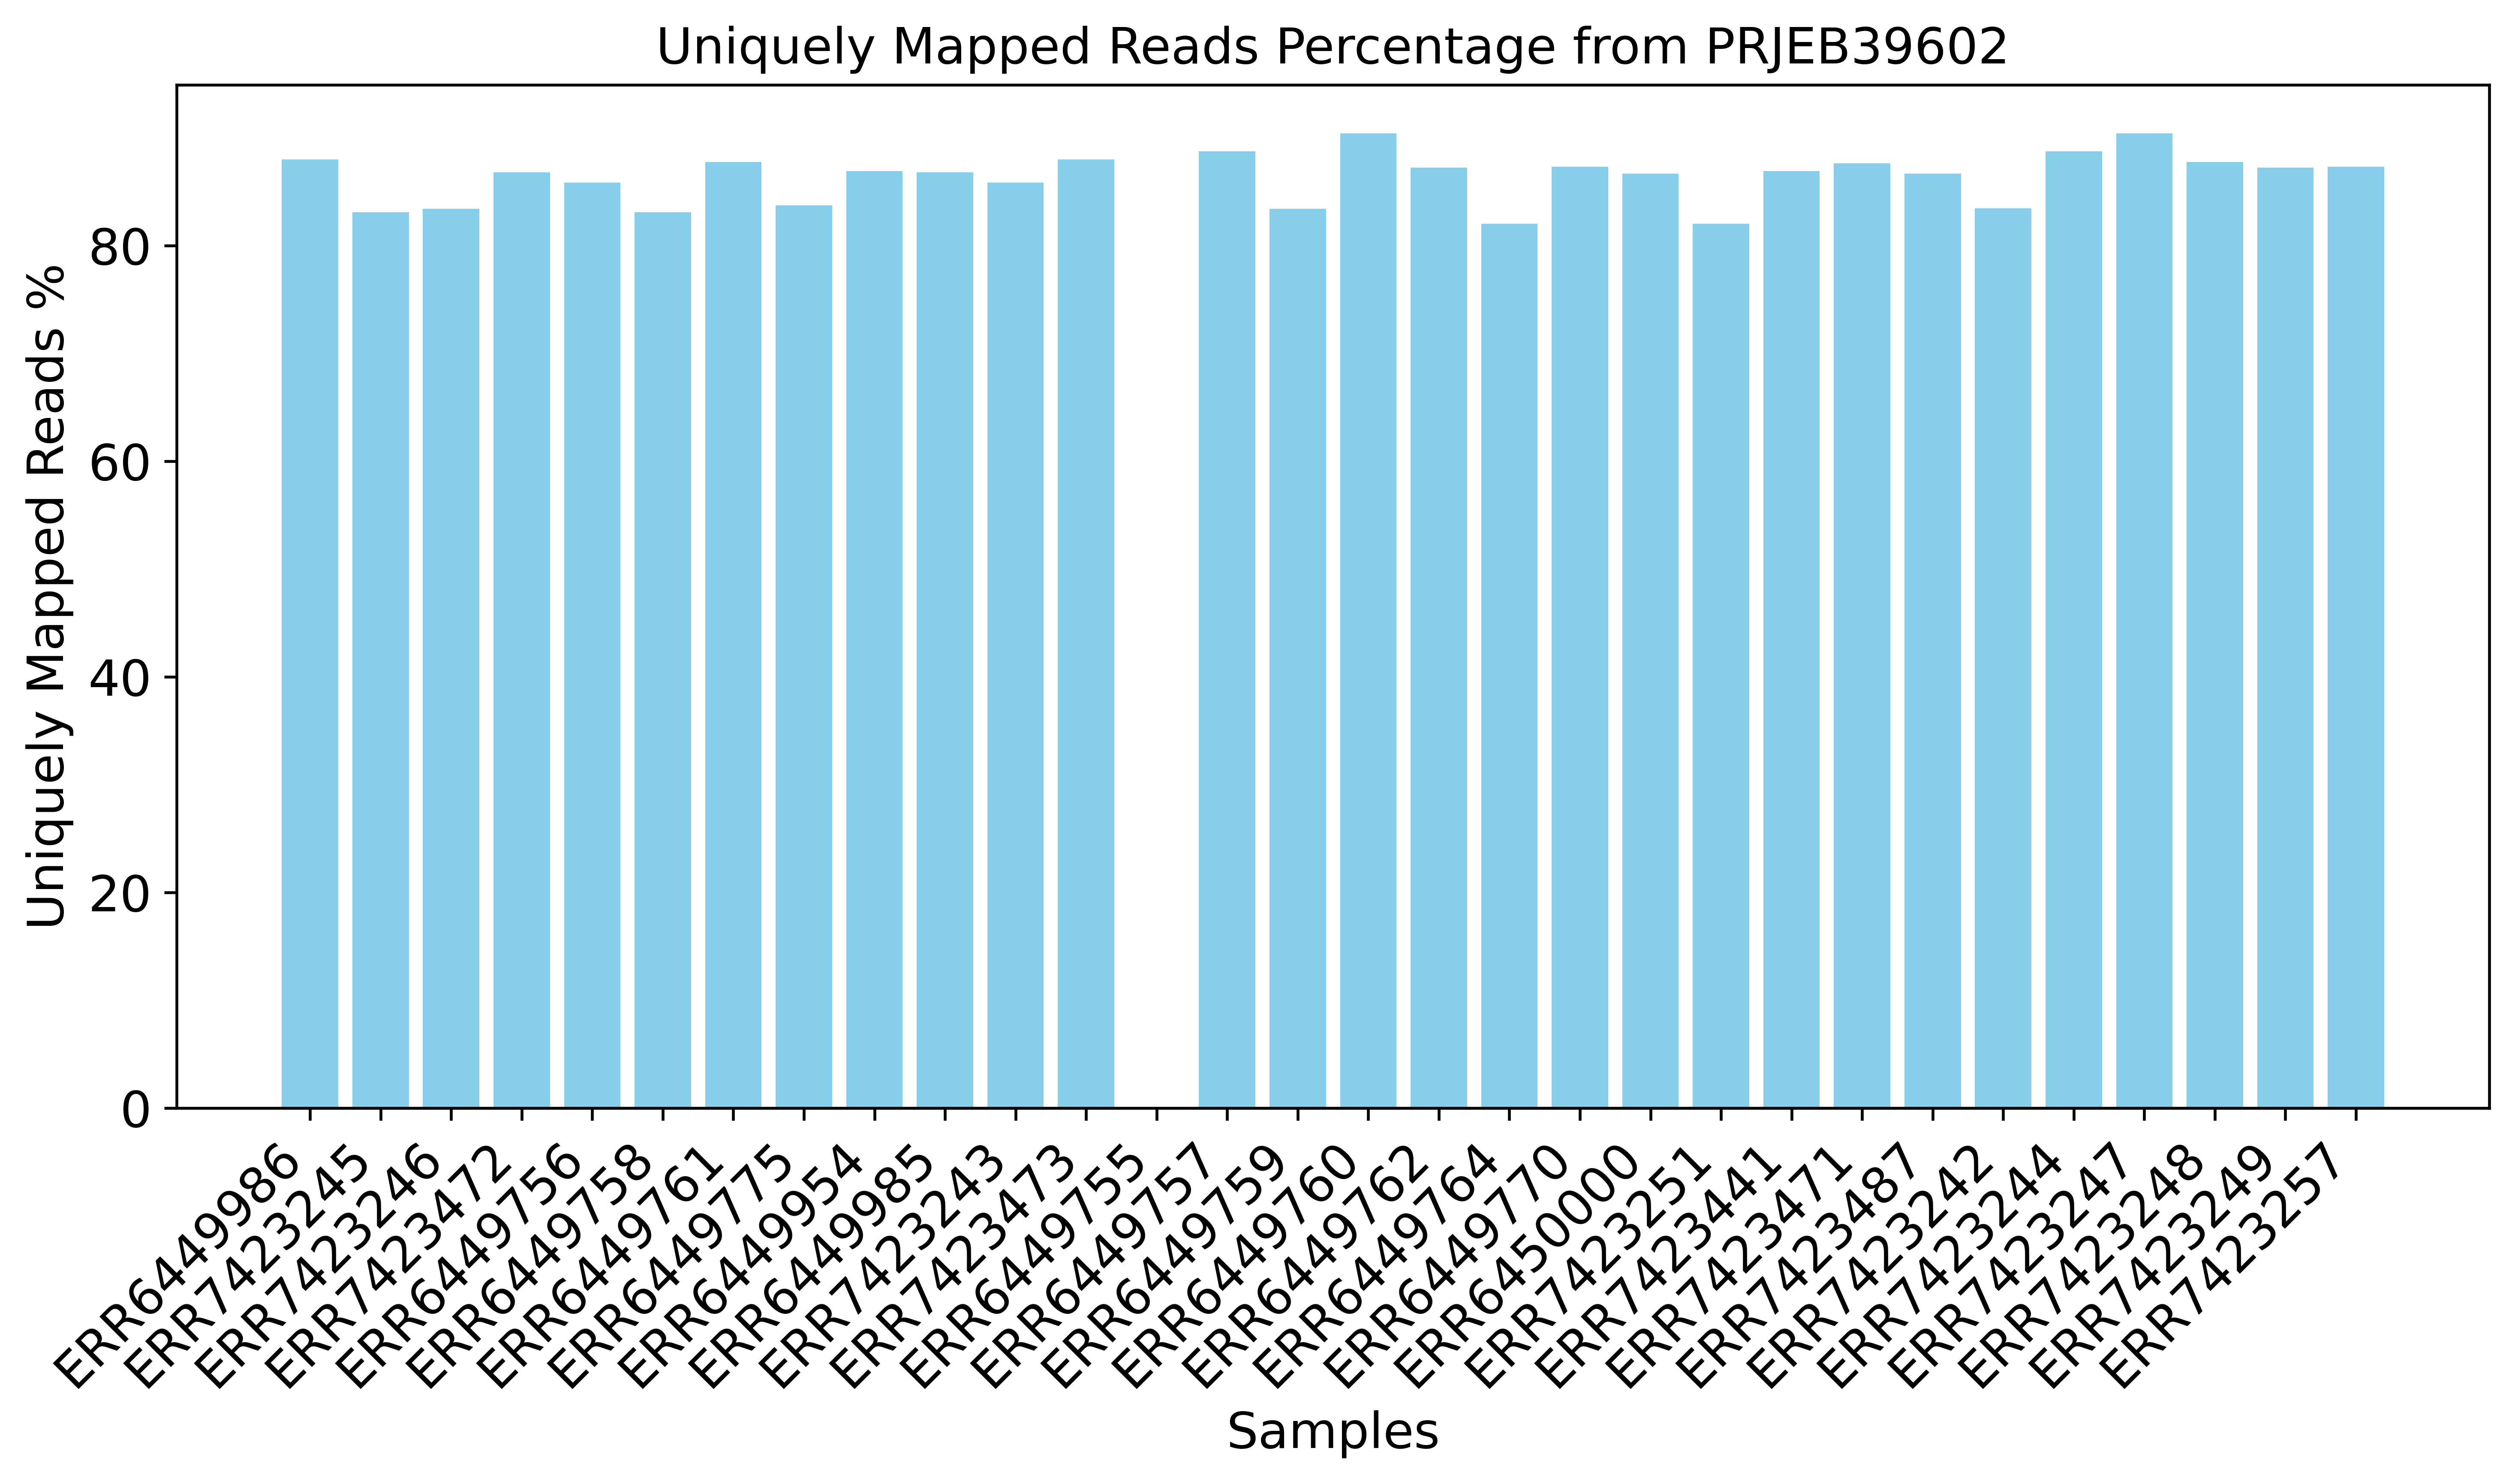


Files not found (2):
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423262/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449984/outputLog.final.out


In [6]:
visualize_uniquely_mapped_reads_from_parent_folder(parent_folder, folders)